# **CS-473 (Pattern Recognition)**

## Assignment 3

##### Nikolaos Kougioulis (csdp1285)

---


### **Part A** 

The scope of this exercise is to get familiar with the Maximum Likelihood Estimation (MLE) technique in order to calculate the parameters of some given distributions. You are given 3 different normal distributions representing 3
different classes. Each distribution is about a different class of 2-dimensional instances. You are asked to fnd the parameters describing the distribution of each class.

**Data – Part A:** For this exercise you will use the dataset included in dataA MLE.csv fle. The dataset consists of 300 samples by row, 100 for each different class (ex. frst 100 rows are about class 0, next 100 rows are about class 1 and the last 100 rows are about class 2). Notice that there are 3 columns. The frst 2 columns represent the features of the data and the last column represents the class label 0, 1, 2.

Equation – Part A: For Part A, you should use the equation of the Gaussian distribution, where $\mu$ is the mean of the data distribution, $\sigma$ is the standard deviation of the data distribution,

$$f_X(x;\mu,\sigma) = \frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{-1}{2}\left( \frac{(x-\mu}{\sigma} \right)^2}$$


In [1]:
!python --version

Python 3.9.16


In [2]:
import math 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("dataA_MLE.csv", sep=",")

Saving dataA_MLE.csv to dataA_MLE.csv


In [4]:
df.columns = ['feature1', 'feature2', 'class']
print(df.head())

    feature1   feature2  class
0  27.090095  12.305978    0.0
1  19.153230   1.122443    0.0
2  32.980913  28.787312    0.0
3  31.816648  18.804721    0.0
4  38.164815  13.315254    0.0


### **Questions**
1. Implement a function which takes as input an array of samples and returns the mean of those samples.

2. Implement a function which takes as input an array of samples and returns the covariance matrix of those samples.

3. Print the mean and the covariance matrix for each one of the 3 classes, using functions from Questions 1 and 2.

4. Considering the functions of Questions 1 and 2 and equation 1, plot each class distribution in one single 3D plot.

---

#### **Solution**

1. Recall that, the Maximum Likelihood Estimator (MLE) for a $k$-dimensional mean vector is $\hat{\mu}_k = \left( \frac{1}{n} \sum_i x_{1i}, \frac{1}{n} \sum_i x_{2i}, \ldots, \frac{1}{n} \sum_i x_{ki}\right)$. In our case, we have three classes (hence three different mean vectors) and two features (hence a $2$-dimensional mean vector and a $2\times 2$ variance-covariance matrix for each of the three classes).


In [5]:
def mean(samples):
  return sum(samples)/len(samples)

 2. Similarly, for the variance-covariance matrix, we can obtain the (adjusted) estimator of the variance,
 
    \begin{align} \displaystyle \hat{\sigma^2} = \frac{1}{n-1} \sum_i (x_i - \hat{\mu} )^{'} (x_i - \hat{\mu})
    \end{align}

In [6]:
#covariance matrix 
def covariance(samples):
  mu = mean(samples)
  cov = np.zeros((len(samples[0]), len(samples[0]))) #2x2
  for i in range(len(samples)):
    cov += np.outer(samples[i] - mu, samples[i] - mu)
  cov /= (len(samples) -1)
  return cov

 3. Using the previous functions, we can print tne mean vector and variance-covariance matrices for the two features of each class:

In [7]:
num_of_classes = len(df['class'].unique())

for i in range(num_of_classes):
    print("class " + str(i) + ":")
    print("Mean: " + str(mean(df[df['class'] == i][['feature1', 'feature2']].values)))
    print("Covariance matrix: \n" + str(covariance(df[df['class'] == i][['feature1', 'feature2']].values)))

class 0:
Mean: [29.25180932 16.87357889]
Covariance matrix: 
[[47.76000366 23.27041795]
 [23.27041795 49.56711595]]
class 1:
Mean: [40.19766916 34.28109099]
Covariance matrix: 
[[ 9.51909586 11.60577546]
 [11.60577546 20.31116764]]
class 2:
Mean: [27.55232503 34.79318037]
Covariance matrix: 
[[14.10984233 11.89326905]
 [11.89326905 25.54392113]]


4. Using *matplotlib* and generating a meshgrid, we can plot the distribution of each of the three classes as follows:

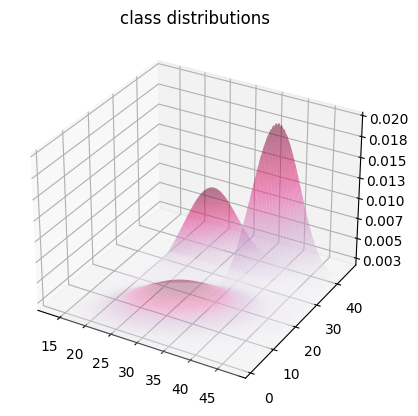

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title("class distributions")

for i in range(len(df['class'].unique())):
    x = df[df['class'] == i]['feature1'].values
    y = df[df['class'] == i]['feature2'].values

    X = np.linspace(x.min(), x.max(), 100)
    Y = np.linspace(y.min(), y.max(), 100)
    X, Y = np.meshgrid(X, Y)

    mu = mean(df[df['class'] == i][['feature1', 'feature2']].values) #mean vector 
    cov = covariance(df[df['class'] == i][['feature1', 'feature2']].values) #covariance matrix
    Z = np.zeros((len(X), len(X[0])))
    for j in range(len(X)):
        for k in range(len(X[0])):
            Z[j][k] = 1 / (2 * np.pi * np.sqrt(np.linalg.det(cov))) * np.exp(-0.5 * np.dot(np.dot(np.array([X[j][k], Y[j][k]]) - mu, np.linalg.inv(cov)), np.array([X[j][k], Y[j][k]]) - mu))
    surf = ax.plot_surface(X, Y, Z, cmap='PuRd', linewidth=2, antialiased=True, alpha=0.3)

    ax.set_zlim(0.002, 0.02)
    ax.zaxis.set_major_formatter('{x:.03f}')

plt.show()

### **Part B - Parzen Windows**

The scope of this exercise is to get familiar with the Parzen Windows in order to estimate the probability density function of the distribution of some given data.

**Data – Part B:**

For this exercise you will use the dataset included in dataB Parzen.csv fle. The dataset consists of 200 samples by row, each samples is 1-dimensional (1 column). We do not have any knowledge or assumption about their distribution.

### **Questions:**

1. Implement the window function $\phi(u)$, when window is a hypercube.

2. Implement the window function $\phi(u)$, when window is a Gaussian kernel.

3. Implement a function which takes as input a single point $x_i$, the center of the window as a single point $c$, the width $h$ of the window and the kernel type (’hypercube’ or ’gaussian’) of the window. The function calls one of the above implemented functions (hypercube window or Gaussian window), with the appropriate input, and returns the result.

4. In this question, you are asked to develop the Density Function of Parzen Window. Implement a function which takes as input an array of 1-d points data, a single point $x$ which represents the center, the width $h$ of the window and the kernel type of the window. The function should return the likelihood of the center $x$, given the other inputs.

5. What’s the best value for the width of the window h? To fnd this, assume that the dataset you have comes from the normal distribution $N(1, 4)$ (this is a univariate normal distribution). Find the most suitable value for $h$ based on that knowledge.

 (a) Create a histogram of the data to convince yourselves that they come from the aforementioned distribution.

 (b) For every $h$ in the range $[0.2, 10]$ with step = $0.1$ calculate 1) the predicted likelihood for every point in the data, 2) their true likelihood (you can use the function norm.pdf(data, loc=1, scale=4)), and 3) the Mean Square Error of the two likelihoods (predicted and true). Repeat this process for both kernels (hypercube and Gaussian). What’s the most suitable value for h for each kernel? Print your answer and create a plot which shows the values of $h$ on the x-axis and their MSE on the y-axis (for both kernels).

#### **Solution**

This exercise is about Parzen-Rosenblatt windows (also known as Kernel Density Estimators (KDEs) in non-parametric Statistics) [2], [3]. 

In [9]:
uploaded = files.upload()
df2 = pd.read_csv("dataB_Parzen.csv", sep=",")

Saving dataB_Parzen.csv to dataB_Parzen.csv


In [52]:
df2.columns = ['x']
print(df2.head())

          x
0  0.792534
1  2.545026
2 -2.240528
3 -3.414621
4  0.414725


1. When the kernel function is a hypercube (also called *rectangular*), 

   \begin{align}
        \phi(\mathbf{u}) = \left\{
        \begin{array}{cl}
        1 & ~\text{if} ~|u_j| < 1/2, ~j=1,2,\ldots,d \\
        0 &  \text{otherwise}
        \end{array}
        \right.
    \end{align}

  for any $\mathbf{u} \in \mathbb{R}^d$.


In [11]:
def phi_hypercube(u): #rectangular - hypercube
    if np.abs(u) < 0.5:
        return 1
    else:
        return 0

2. In the case of a Gaussian kernel, we assume the centroids follow a univariate Gaussian distribution $\mathcal{N}(0,1)$, that is,

$$\phi(\mathbf{u}) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$$

In [12]:
def phi_gaussian(u): #Gaussian
    return np.exp(-0.5 * u**2) / np.sqrt(2 * np.pi)

3.

In [13]:
# define Parzen window function
def parzen_window(x_i, c, h, kernel_type):
    if kernel_type == "hypercube":
        return phi_hypercube((x_i - c) / h)
    elif kernel_type == "gaussian":
        return phi_gaussian((x_i - c) / h)
    else:
        raise Exception("Invalid kernel type")

4. The estimation of the pdf of the random vector $\mathbf{x}$ (likelihood) is 
   
   \begin{align}
   p_n (x) = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{V_n} \phi \left( \frac{\mathbf{x} - \mathbf{x_i}}{h} \right) \equiv (nh)^{-1} \sum_{i=1}^{n} \phi \left( \frac{\mathbf{x} - \mathbf{x_i}}{h} \right)
   \end{align}

 Notice that the above indeed represents a pdf. To convince ourselves, see that $\forall x, ~p_n(x) \geq 0$ and, by uniform convergence of $\phi$, we can swap integration and summation to obtain

   \begin{align} 
   \int_{-\infty}^{\infty} p_n (x) dx = (nh)^{-1} \sum_{i=1}^{n} \int_{-\infty}^{\infty} \phi \left( \frac{\mathbf{x} - \mathbf{x_i}}{h} \right)dx_i
   \end{align}

 setting $u = \frac{x - x_i}{h} \Rightarrow du = - h \cdot dx_i$ and taking into account that for $x_i=-\infty: u = +\infty$ and $x_i = +\infty: u = - \infty$, we have

  \begin{align}
  \int_{-\infty}^{\infty} p_n (x) dx = -(nh)^{-1} \sum_{i=1}^{n} \int_{+\infty}^{-\infty} h\phi \left( u_i \right)du_i = n^{-1} \sum_{i=1}^{n} \int_{-\infty}^{+\infty} \phi \left( u_i \right)du_i = n^{-1} \cdot n = 1
  \end{align}

  The above probability is computed with the following function:

In [26]:
def prob(arr, x, h, kernel_type):
    tot = 0
    for i in range(len(arr)):
        if kernel_type == "hypercube":
            tot += phi_hypercube((x - arr[i]) / h)
        elif kernel_type == "gaussian":
            tot += phi_gaussian((x - arr[i]) / h)
        else:
            raise Exception("Invalid kernel type")
    return tot / (len(arr)*h)

5.  (a) It is important to sense what lies behind this question. The intuition is that that the genesis of density estimation is highly correlated to creating a histogram. Note that the derivation of the histogram is based on the idea that $$\frac{1}{n \cdot \text{interval length}} \cdot \text{#(number of observations falling into a small interval containing x)}$$ adequately estimates the density $f(x)$.

In [32]:
#Guassian pdf helper function instead of norm.pdf from scipy.stats
def gaussian_pdf(x,mu,sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x-mu)/sigma)**2)

 One can plot the sample histogram with the normal distribution with mean $1$ and variance $4$ fitted as follows:

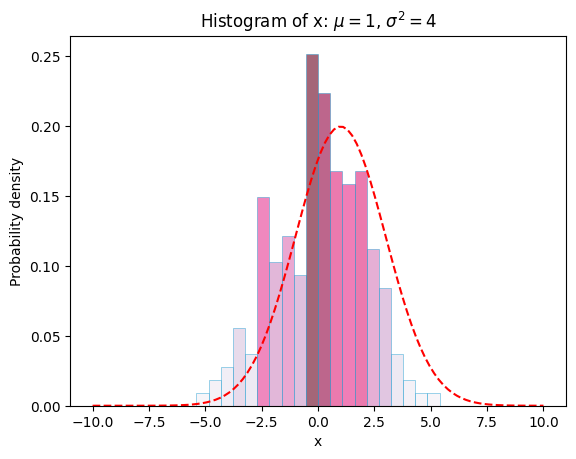

In [33]:
# from scipy.stats import norm 

mu = 1
sigma_squared = 4

x = np.linspace(-10, 10, 100)
num_bins = 20

fig, ax = plt.subplots()
n, bins, patches = ax.hist(df2["x"].values, num_bins, density=1, facecolor = '#2ab0ff', edgecolor='#169acf', alpha=0.6, linewidth=0.5)

#TODO: drop use of norm.pdf
#y = norm.pdf(x, mu, np.sqrt(sigma_squared)
#DONE
y = gaussian_pdf(x,mu,np.sqrt(sigma_squared))

for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.PuRd(n[i]/max(n)))

ax.plot(x, y, '--', color='red')
ax.set_xlabel('x')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of x: $\mu=1$, $\sigma^2=4$')
plt.show()

fig.tight_layout() #prevent label clipping

5. (b) Assuming the data follows the normal distribution with mean $1$ and variance $4$, we iterate through bandwidth values from $0.2$ to $10$ with step $0.1$, choosing the one with the minimum Mean Squared Error (MSE). In this case, the mean squared error of the estimated probability density and the true probability density. Recall that if $\hat{\theta}$ is an estimator of $\theta$, the MSE of $\hat{\theta}$ is given by

$$MSE = \mathbb{E}\left[\left( \theta - \hat{\theta} \right)^2 \right] \equiv \frac{1}{n} \sum_{i=1}^{n} \left(\theta - \hat{\theta} \right)^2 $$

In [46]:
def phi_gaussian2(u):
    #Gaussian with mean 1 and variance 4
    return np.exp(-0.5 * (u - 1)**2 / 4) / np.sqrt(2 * np.pi * 4)

#likelihood function using Parzen window with fixed Gaussian kernel
def prob2(arr, x, h):
    tot = 0
    for i in range(len(arr)):
        tot += phi_gaussian((x - arr[i]) / h)
    return tot / (len(arr)*h)

In [47]:
#mean squared error helper function instead of mean_squared_error from sklearn.metrics
def mse(x,y):
  return np.mean((x - y)**2)

We can now plot the MSE for every $h \in \left\{ 0.2,0.3, \ldots, 10 \right\}$:

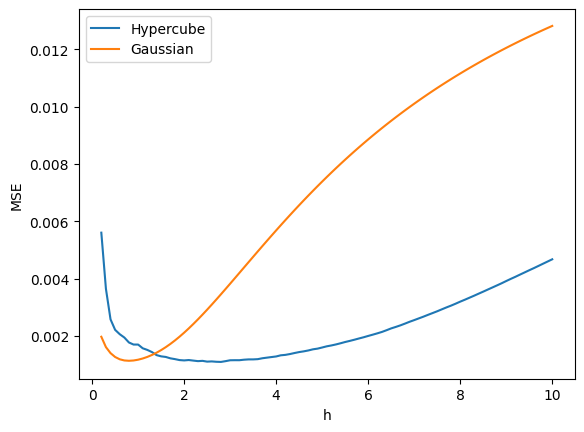

In [53]:
#from sklearn.metrics import mean_squared_error

#mse for hypercube (rectangular) kernel
mse_hypercube = []
for h in np.arange(0.2, 10.1, 0.1):
    mse_hypercube.append(mse(phi_gaussian2(df2["x"].values), [prob(df2["x"].values, x_i, h, "hypercube") for x_i in df2["x"].values]))

#mse for Gaussian kernel
mse_gaussian = []
for h in np.arange(0.2, 10.1, 0.1):
    mse_gaussian.append(mse(phi_gaussian2(df2["x"].values), [prob(df2["x"].values, x_i, h, "gaussian") for x_i in df2["x"].values]))

plt.plot(np.arange(0.2, 10.1, 0.1), mse_hypercube, label="Hypercube")
plt.plot(np.arange(0.2, 10.1, 0.1), mse_gaussian, label="Gaussian")
plt.xlabel("h")
plt.ylabel("MSE")
plt.legend()
plt.show()

In [54]:
print("Minimum MSE for Gaussian kernel achieved for h: ", round(np.arange(0.2, 10, 0.1)[np.argmin(mse_gaussian)-1],2))
print("Minimum MSE for rectangular kernel achieved for h: ", round(np.arange(0.2, 10, 0.1)[np.argmin(mse_hypercube)-1],2))

Minimum MSE for Gaussian kernel achieved for h:  0.7
Minimum MSE for rectangular kernel achieved for h:  2.7


As a matter of fact, if *Gaussian* basis functions are used to approximate univariate data, and the underlying density being estimated is *Gaussian*, Silverman's rule of thumb [4] provides a computationally efficient formula for the optimal choice of h. Without going into much detail, that is derived by minimizing the integrated mean squared error (IMSE), with the optimum bandwidth (in integrated mean square error terms) being a function of the IMSE second derivative, given by $h = \left( \frac{4 \hat{\sigma}^5}{3n}\right)^{\frac{1}{5}} = 1.06 \hat{\sigma} \cdot n^{-1/5}$.

In [39]:
silvermans_best_h = ((4 * np.std(df2["x"].values)**5 )/(3* len(df2["x"].values)))**(1/5)
print("Best h for Gaussian kernel:", round(silvermans_best_h,5))

mse = mse(phi_gaussian2(df2["x"].values), [prob(df2["x"].values, x_i, silvermans_best_h, "gaussian") for x_i in df2["x"].values])
print("Gaussian MSE for best_h:", round(mse,5))

Best h for Gaussian kernel: 0.7248
Gaussian MSE for best_h: 0.00114


which is the same bandwidth with the one found earlier, up to the first decimal point. A plot of the Parzen-Rosenblatt windows for hypercube and Gaussian kernels for the optimal bandwidth illustrate their performance:

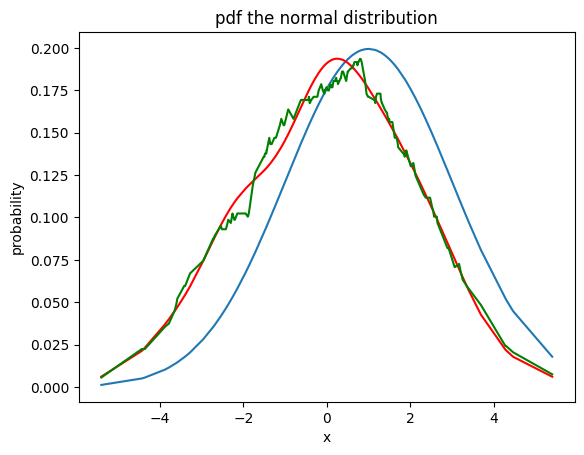

In [59]:
#x = np.linspace(df2["x"].min(), df2["x"].max(), 100)
x = np.sort(df2["x"].values)

y = phi_gaussian2(x)

plt.plot(x, y)
plt.title("pdf the normal distribution")
plt.xlabel("x")
plt.ylabel("probability")

#pdf plot obtained by the parzen window with given h
y = [prob(df2["x"].values, x_i, 0.7, "gaussian") for x_i in x]
plt.plot(x, y, color="red")

z = [prob(df2["x"].values, x_i, 2.7, "hypercube") for x_i in x]
plt.plot(x, z, color="green")

plt.show()

### **Part C**

The scope of this exercise is to get familiar with the K-Nearest Neighbors (KNN) Classifier.

**Data – Part C:** For this exercise you will use the dataset included in dataC KNNtrain.csv and dataC KNNtest.csv files. The dataset consists of $50$ samples by row. You notice that each sample has 3 columns. The first 2 columns represent the 2-dimensional data and the last column represents their label ($0,1$).

## **Questions** 

1. Implement a function which has as input a 2D point $x$ and an numpy array train data of 2D points and it computes the Euclidean distances of that point $x$ to all points in the given array. The function should return that numpy array of the Euclidean distances.

2. Implement a function which has as input a 2D point $x$, an numpy array train data of 2D points and a number $k$. The function returns the $k$ closer neighbors of $x$. As neighbors we call all the points in the training data. *Hint:* Use the function from Question 1.

3. In this step you are asked to develop the k-NN algorithm. Implement a function which has as input the train data, the test data and a number $k$ of neighbors that will be considered during k-NN. The function should return two probabilities for each sample $x_i$ of the test data, the probability of $x_i$ sample belong to class $0$ and the probability of $x_i$ sample belong to class 1, respectively. These probabilities should add to $1$.

4. In this question you are asked to search for the best $k$ number, meaning to select a number k that maximizes the accuracy of the k-NN classifier. Compute the accuracy of the classifier from Question 3, for each $k$ in the
set of $1,3,5,7,9,11,13,15$ (e.g. acc = ? when $k = 3$, .., acc = ? when $k = 11$,..).Plot with point markers the above results, print and explain which $k$ you would choose.

5. (Bonus 10%) Show the decision boundaries of your classifier in a 2D plot, using the value for $k$ from the previous task.


#### **Solution**


In [ ]:
uploaded = files.upload()
train_data = pd.read_csv("dataC_ΚΝΝtrain.csv", sep=",")
uploaded = files.upload()
test_data = pd.read_csv("dataC_ΚΝΝtest.csv", sep=",")

Saving dataC_ΚΝΝtrain.csv to dataC_ΚΝΝtrain.csv


Saving dataC_ΚΝΝtest.csv to dataC_ΚΝΝtest.csv


1. As we know from kindergarten, the Euclidean distance between two points $\mathbf{x} = (x_1,\ldots,x_n), ~\mathbf{y} = (y_1,\ldots,y_n) \in \mathbb{R}^n$ is

  $$d_e(\mathbf{x},\mathbf{y}) = \left( \sum_{i=1}^{n} \left( x_i - y_i \right)^2 \right)^{1/2}$$

so we define the helper function *euclidean_distance*:

In [ ]:
train_data.columns = ['x', 'y', 'class']
test_data.columns = ['x', 'y', 'class']

def euclidean_distance(x, y):
   return np.sqrt(np.sum((x - y)**2))

2. The next step is to implement a function to compute all Euclidean distances from a point $x$ to all the training data.

In [ ]:
def euclidean_distances(x, train_data):
    distances = np.zeros(len(train_data))
    for i in range(len(train_data)):
        distances[i] = euclidean_distance(x, train_data[i])
    return distances

We now need to return the k nearest neighbors of point x.

In [ ]:
def k_nearest_neighbors(x, k, train_data):
    distances = euclidean_distances(x, train_data)
    k_nearest_indices = np.argsort(distances)[:k]
    return k_nearest_indices # return the indices of the k nearest neighbors

3. The *knn_algorithm* function computes the nearest neighbor probabilities by counting the number of k-nearest classes and dividing by the number $k$ of nearest neighbors. Then, the most favorable class can be obtained using argmax. For example, for a binary task, if $k=3$ and two of the nearest three neighbors of $x$ belong to class 0 and the other one to class 1, then the probabilities of x belonging to each class given $k=2$ and that set of neighbors is $p_0 = 2/3$ and $p_1 = 1/3$, hence $x \in C_0$.

In [ ]:
def knn_algorithm(k, train_data, test_data):
    probabilities = np.zeros((len(test_data), 2))
    for i in range(len(test_data)):
        k_nearest_indices = k_nearest_neighbors(test_data[i, :2], k, train_data[:, :2])

        class_0, class_1 = 0, 0
        for j in k_nearest_indices:
            if train_data[j, 2] == 0:
                class_0 += 1
            else:
                class_1 += 1
        probabilities[i][0] = class_0 / k
        probabilities[i][1] = class_1 / k
    return probabilities

At this point, the cautious reader may have noticed the computational complexity in order to run *knn_algorithm*: To find the k-nearest neighbors for a single datapoint, we compute all distances to the training datapoints ( $O(n)$), then choose the k smallest elements by sorting in $O(n\log n)$ and then choose the first k neighbors. We then compute the class probabilities by iterating through the k nearest neighbors of each test datapoint, so in total $O(n) \cdot O(n\log n) \cdot O(1) = O(n^2\log n)$.

Note that the training phase does not exist, as we are computing the nearest neighbors and their distances for every new data point one at a time (brute-force approach). We can improve this by using k-d trees (standing for k-dimensional trees), a generalization of binary search trees. The k-d tree is constructed during the training phase, in $O(n \log n)$ time, and then lookup of the k-nearest neighbors on the k-d tree for every new test datapoint can be efficiently done in logarithmic time. This efficient approach is however outside the scope of this assignment.

4. We can now search for the optimal number of neighbors $k$ by linearly searching through the interval $[1,15]$ of positive integers, with step $2$ each time, after defining the accuracy and selecting the one with the highest accuracy.

In [ ]:
def accuracy(predictions, test_data):
    true_positives = 0
    for i in range(len(predictions)):
        if predictions[i][0] > predictions[i][1] and test_data[i][2] == 0:
            true_positives += 1
        elif predictions[i][0] < predictions[i][1] and test_data[i][2] == 1:
            true_positives += 1
    return true_positives / len(predictions)

predictions = knn_algorithm(11, train_data.values, test_data.values)
#print(predictions)

#obtain the classes of the predictions
classes = np.zeros(len(predictions))
for i in range(len(predictions)):
    if predictions[i][0] > predictions[i][1]:
        classes[i] = 0
    else:
        classes[i] = 1

accuracies = []
for k in range(1, 16, 2):
  predictions = knn_algorithm(k, train_data.values, test_data.values)
  accuracies.append(accuracy(predictions, test_data.values))
  print("Accuracy for k-nn with k = " + str(k) + ":", accuracy(predictions, test_data.values))
print("Best accuracy achieved for k =", np.arange(1, 31, 2)[np.argmax(accuracies)])

Accuracy for k-nn with k = 1: 0.5510204081632653
Accuracy for k-nn with k = 3: 0.5510204081632653
Accuracy for k-nn with k = 5: 0.6326530612244898
Accuracy for k-nn with k = 7: 0.5714285714285714
Accuracy for k-nn with k = 9: 0.6530612244897959
Accuracy for k-nn with k = 11: 0.7346938775510204
Accuracy for k-nn with k = 13: 0.7346938775510204
Accuracy for k-nn with k = 15: 0.7142857142857143
Best accuracy achieved for k = 11


We can obtain a smoother line by computing the accuracy for each $k=1,2,\ldots,15$, but for now we stick to step $2$ as per guidelines:

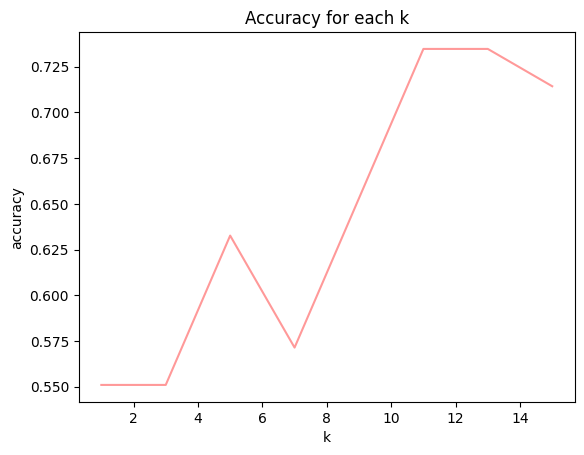

In [ ]:
#plot the accuracy for each k=1,3,5,\ldots,15
plt.plot(range(1, 16, 2), accuracies, color="r", alpha=0.4)
plt.title("Accuracy for each k")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

5. We can now plot the decision boundary for the optimal value $k$ of neighbors, by first plotting the training data points and then by creating a meshgrid.

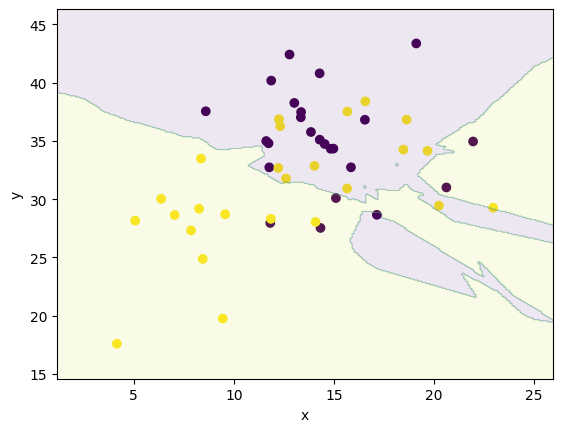

In [ ]:
#plot the training data points
plt.scatter(train_data['x'], train_data['y'], c=train_data['class'])

#to plot the decision boundaries, we need to create a meshgrid

x_min, x_max = train_data['x'].min() - 3, train_data['x'].max() + 3
y_min, y_max = train_data['y'].min() - 3, train_data['y'].max() + 3

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

grid = np.c_[xx.ravel(), yy.ravel()] #flattened meshgrid

predictions = knn_algorithm(11, train_data.values, grid)

predicted_classes = np.argmax(predictions, axis=1)

plt.contourf(xx, yy, predicted_classes.reshape(xx.shape), alpha=0.1, cmap='viridis')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### **References**

1. Duda, R. O., & Hart, P. E. (2006). *Pattern classification*. John Wiley & Sons.

2. Wasserman, L. (2004). *All of Statistics: A concise course in Statistical Inference* (Vol. 26). New York: Springer.

3. Härdle, W., Müller, M., Sperlich, S., & Werwatz, A. (2004). *Nonparametric and Semiparametric Models* (Vol. 1). Berlin: Springer.

4. Silverman, B. W. (1986). *Density estimation for statistics and data analysis* (Vol. 26). CRC press.
 